In [73]:
from sklearn import datasets
digit_dataset = datasets.load_digits()
digit_dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [74]:
type(digit_dataset)

sklearn.utils._bunch.Bunch

In [75]:
digit_dataset["images"].shape

(1797, 8, 8)

In [76]:
type(digit_dataset["images"])

numpy.ndarray

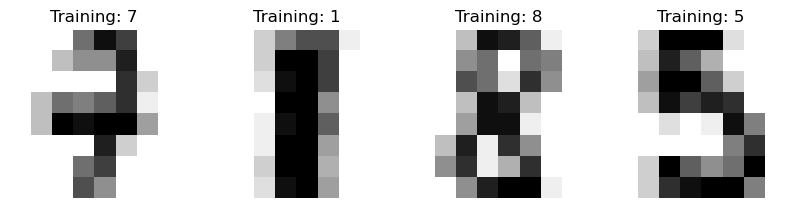

In [77]:
import matplotlib.pyplot as plt
from random import randint

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax in axes:
    num = randint(1, 1000)
    image = digit_dataset["images"][num]
    label = digit_dataset["target"][num]
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [78]:
from sklearn.model_selection import train_test_split

X = digit_dataset["data"]
Y = digit_dataset["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [79]:
print(X.shape, X_train.shape, X_test.shape)

(1797, 64) (1347, 64) (450, 64)


In [80]:
from sklearn.linear_model import LogisticRegression

logreg_ovr = LogisticRegression(multi_class="ovr")
logreg_softmax = LogisticRegression(multi_class="multinomial", solver="sag")

#model fit
logreg_ovr.fit(X_train, Y_train)
logreg_softmax.fit(X_train, Y_train)

/home/matt/miniconda3/envs/my_project/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/matt/miniconda3/envs/my_project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

In [81]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred_ovr = logreg_ovr.predict(X_test)
y_pred_softmax = logreg_softmax.predict(X_test)
print("ovr model:")
print(confusion_matrix(Y_test, y_pred_ovr))
print("softmax model:")
print(confusion_matrix(Y_test, y_pred_softmax))


ovr model:
[[42  0  0  0  1  0  0  0  0  0]
 [ 0 35  1  0  0  0  0  0  1  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  0  1  0]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  1  0  0 57  0  0  1  0]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  1  0  0  0  1  0  0 36  0]
 [ 0  0  0  0  0  0  0  0  4 44]]
softmax model:
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 36  1  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  0  1  0]
 [ 0  1  0  0 53  0  1  0  0  0]
 [ 0  0  1  0  0 56  1  0  0  1]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  0  0  0  0  1  0  0 37  0]
 [ 0  0  0  0  0  0  0  0  1 47]]


In [82]:
print("ovr model:")
print(f"classification_report \n{classification_report(Y_test, y_pred_ovr)}")
print("softmax model:")
print(f"classification_report \n{classification_report(Y_test, y_pred_softmax)}")

ovr model:
classification_report 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.95      0.95      0.95        37
           2       0.95      1.00      0.97        38
           3       1.00      0.96      0.98        46
           4       0.98      0.98      0.98        55
           5       0.95      0.97      0.96        59
           6       1.00      0.98      0.99        45
           7       1.00      0.98      0.99        41
           8       0.84      0.95      0.89        38
           9       0.98      0.92      0.95        48

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.97      0.96      0.96       450

softmax model:
classification_report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.97      0.97        37
      

In [83]:
print("ovr model:")
print(f"accuracy_score: {accuracy_score(Y_test, y_pred_ovr)}")
print("softmax model:")
print(f"accuracy_score: {accuracy_score(Y_test, y_pred_softmax)}")

result = confusion_matrix(Y_test, y_pred_ovr)
result.diagonal().sum() / result.sum()

ovr model:
accuracy_score: 0.9644444444444444
softmax model:
accuracy_score: 0.9733333333333334


0.9644444444444444

In [84]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_ovr, pos_label=1)

In [85]:
# roc_auc = roc_auc_score(y_test, y_pred_ovr, multi_class="ovr")
roc_auc = auc(fpr, tpr)
roc_auc

0.12535174399581178

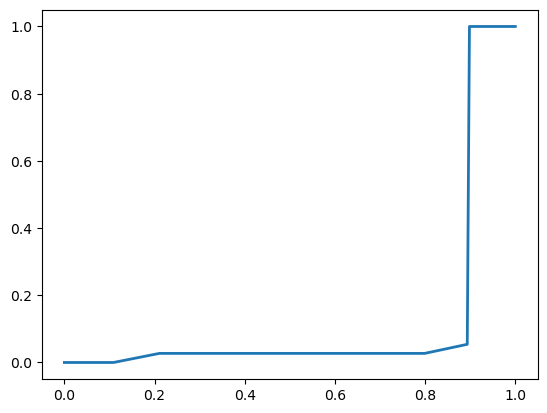

In [86]:
plt.figure()
lw=2
plt.plot(fpr, tpr, lw=lw, label = "roc_curve")
plt.show()